# Introducción a Pandas.


En este cuaderno veremos los elementos y funciones básicas de la librería **Pandas**. Los contenidos específicos son:

1. Introducción a Pandas.
2. Dónde encontrar datos.
3. Carga de datos de diferentes formatos.
4. Series y DataFrames.
5. Revisando los datos.
6. Selección de datos por etiqueta.
7. Selección de datos por posición.
8. Operaciones básicas: Estadísticos.
9. Operaciones básicas: Apply.
10. Unión de datos: Concatenación.

### Planteamiento del problema:

Limpiar, analizar y obtener información de un conjunto de datos tabulados es útil al tratar de **obtener conocimiento** de la información que tenemos. Utilizaremos lo aprendido en este módulo para analizar tres datasets distintos.

## ¿Qué es Pandas?

<center>
    <img width="30%" src="https://pandas.pydata.org/docs/_static/pandas.svg">
</center>

**Pandas** es una librería de Python con la que puedes trabajar con datos tabulados. Es muy útil para limpiar, analizar y procesar datos.

De acuerdo con Wikipedia: _"(...) es una biblioteca de software escrita como extensión de **NumPy** para manipulación y análisis de datos para el lenguaje de programación Python. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales."_

### Objetos en Pandas.

En Pandas, los objetos con los que trabajaremos son dos: **DataFrames** y Series. Un DataFrame lo puedes entender como un **tabla** (como las de Excel), y una **Series** como una **tabla con una sola columna**. Más adelante veremos mas a detalle a estos dos objetos que son los objetos base de Pandas.

In [47]:
# Importamos el módulo que aprenderemos en este módulo :)
import pandas as pd

# También usaremos un poco Numpy
import numpy as np

## ¿Dónde encontrar datos?

En internet existen repositorios de **datos abiertos** de los que puedes descargar datasets, jugar con ellos, analizarlos y aprender. Algunos ejemplos:

1. [Kaggle](https://www.kaggle.com/datasets): Sitio web para prácticar y aprender sobre **ciencia de datos y machine learning**. Además de los datasets que hay en el sitio, ¡puedes cejecutar notebooks como este!. Los dataset están por lo general explicados y listos para usarse.
2. [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php): En este repositorio hay más de **500 datasets** de diversos temas. Usualmente son útiles para practicar y aprender sobre machine learning.
3. [Datos Abiertos Madrid](https://datos.madrid.es/portal/site/egob): En este sitio web se encuentra una recopilación de datos abiertos de diversas instituciones. Datos de tráfico, bicimad,etc.
4. [Datos Abiertos España](https://datos.gob.es/es/catalogo): Diversas colecciones de datos abiertos del Gobierno de la Nación.

Incluso puedes encontrar **datos abiertos de ciencia**:
1. [CERN Opendata](https://opendata.cern.ch/): Más de dos petabytes de datos de **física de partículas**.
2. [NASA Open Data Portal](https://data.nasa.gov/): Datos aeroespaciales, de ciencias de la tierra... **¡Muchos datos!**✨

Esta no es una lista exhaustiva, hay muchos más recursos disponibles con los que puedes trabajar.


## Carga de datos de diferentes formatos.

Con Pandas puedes **cargar datos** de archivos externos, los cuales pueden estar en internet o en tu computadora (quizá bajaste alguna de las páginas de arriba 👀). Por lo general se utilizan datos tabulados (tablas) en Pandas, y los tipos de archivos desde los que puedes cargar datos son varios. Los más comunes son archivos con _valores separados por comas_ o CSV, por sus siglas en inglés, con extensión **.csv** y archivos de Excel con extensión **.xlsx**.


```python
# Para importar un archivo csv
datos = read_csv('nombre_del_archivo.csv')

# Para importar un archivo de excel
datos = read_excel('nombre_del_archivo.xlsx')
```

<center>
    <img width="90%" src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">
</center>

Hay más tipos de archivos válidos, como **.html** o **.json** y se importan al igual que los ejemplos anteriores. De la misma manera en la que cargamos datos, podemos guardar un DataFrame o una Series en un archivo con extensión válida:

```python
# Guardamos los datos en un archivo CSV
datos.to_csv('datos_guardados.csv')
```
Ahora, cargaremos tres datasets que usaremos más adelante. Este primer dataset viene de: _Kaggle_, [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data). El dataset describe información de personas que viajaban en el Titanic.

In [48]:
# Importamos un archivo de Excel que está compartido en Drive
df_titanic = pd.read_excel('https://docs.google.com/uc?id=13o2VM-LfleUumsE2Js-QbalirpKDxi1x',index_col=0)

# Podemos ver el inicio de un DataFrame con .head()
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Columnas

survival - Survival (0 = No; 1 = Yes).  
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd).  
name - Name.  
sex - Sex.  
age - Age.  
sibsp - Number of Siblings/Spouses Aboard.  
parch - Number of Parents/Children Aboard.  
ticket - Ticket Number.  
fare - Passenger Fare.  
cabin - Cabin.  
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).  



El siguiente dataset viene de muestra dentro de Google Colab, y describe información poblacional e inmobiliaria de California.

In [49]:
# Importamos un archivo CSV que viene de ejemplo en Google Colab
df_casas = pd.read_csv('sample_data/california_housing_test.csv')
df_casas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


Finalmente, datos de: [Wikipedia - World population](https://en.wikipedia.org/wiki/World_population), sobre los 10 países más densamente poblados en el mundo.

In [50]:
# Podemos importar tablas que estén en páginas Web como wikipedia
tabla_poblacion = pd.read_html('https://en.wikipedia.org/wiki/World_population',
                            match = '10 most densely populated countries')

df_poblacion = tabla_poblacion[0].set_index('Country')
df_poblacion

,Rank,Population,Area (km2),Density (pop/km2)
Country,,,,
Singapore,1,5921231,719,8235
Bangladesh,2,165650475,148460,1116
Palestine[note 3][101],3,5223000,6025,867
Taiwan[note 4],4,23580712,35980,655
South Korea,5,51844834,99720,520
Lebanon,6,5296814,10400,509
Rwanda,7,13173730,26338,500
Burundi,8,12696478,27830,456
Israel,9,9402617,21937,429


## Series y DataFrames.

Como ya mencionamos, una Series se puede entender como una **tabla con una sola columna**, aunque también puedes verla como una lista donde cada elemento tiene una etiqueta, un **índice** el cual por default es un número entero de la posición del elemento.

<center>
    <img width="12%" src="https://pandas.pydata.org/docs/_images/01_table_series.svg">
</center>
Para crear una serie partiendo de una lista:


In [51]:
serie = pd.Series(['Hola', 3.1416, 'A'])

# Imprimimos la serie que creamos
print(serie)

# Información de la serie
print("\nTipo de dato: ", type(serie))
print("Tamaño: ", serie.size)

0      Hola
1    3.1416
2         A
dtype: object

Tipo de dato:  <class 'pandas.core.series.Series'>
Tamaño:  3


Observamos cómo cada elemento de la lista ahora tiene un índice. Podemos especificar el índice explícitamente:

In [52]:
serie = pd.Series(data = ['Aaa', 'Bbb', 'Ccc'],
                  index = ['Elemento 1', 'Elemento 2', 'Elemento 2'])

print(serie)

# Podemos obtener un elemento con su índice
print(serie['Elemento 1'])


Elemento 1    Aaa
Elemento 2    Bbb
Elemento 2    Ccc
dtype: object
Aaa


Los **DataFrames** son más complejos que las Series, ya que ahora tenemos una **tabla con varias columnas**. En este caso, tendremos **índices** para cada fila y también etiquetas para las **columnas**. Los valores default son también enteros que indican la posición.

<center>
    <img width="30%" src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">
</center>


In [53]:
# Creemos DataFrame con una matriz aleatoria.
df = pd.DataFrame(data = np.random.rand(3, 4))

print("Tipo: ", type(df)) # Tipo de objeto
print("Tamaño: ", df.size)  #El tamaño es igual al número de celdas
df # Visualizamos el DataFrame completo

Tipo:  <class 'pandas.core.frame.DataFrame'>
Tamaño:  12


,0,1,2,3
0,0.206356,0.440780,0.401627,0.138840
1,0.740638,0.615381,0.280460,0.722478
2,0.167334,0.110855,0.238475,0.396429


In [54]:
# Podemos crear DataFrames a partir de diccionarios CUADRADOS
df_dict = pd.DataFrame({
    'Nombre':['Juan', 'María', 'Guadalupe'],
    'Edad':[18, 22, 34],
    'Altura':[1.73, 1.80, 1.50],},
    index = ['Persona 1', 'Persona 2', 'Persona 3']) # Especificamos índice
df_dict

,Nombre,Edad,Altura
Persona 1,Juan,18,1.73
Persona 2,María,22,1.80
Persona 3,Guadalupe,34,1.50


## Revisando los datos.

Para visualizar los datos de un DataFrame, tenemos dos opciones:

```python
# Mostramos las primeras 7 filas.
df.head(n = 7)

# Mostramos las últimas 4 filas.
df.tail(n = 4)
```
Si queremos ver un DataFrame completo, lo ponemos solo en una celda.

```python
# Para ver todo el DataFrame
df
```
Si el DataFrame es muy grande, no se podrá visualizar completo. Veamos los primeros tres y los últimos cuatro elementos del DataFrame de los datos que cargamos del Titanic.


In [55]:
df_titanic.shape

(891, 11)

In [56]:
df_titanic.head(n = 3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [57]:
df_titanic.tail(n = 4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Además de consultar partes del DataFrame, también podemos consultar las etiquetas en las **filas** y las **columnas**, así como todos los **valores** del DataFrame.

```python
columnas = df.columns  # Obtenemos columnas
indice = df.index  # Obtenemos filas
valores = df.values  # Obtenemos valores
```
Veamos un ejemplo de esto:


In [58]:
columnas = df_dict.columns
filas = df_dict.index
valores = df_dict.values

print('Columnas: ', columnas, '\nFilas: ', filas)
print(valores, type(valores))  # Los valores son una matriz de NumPy!!

df_dict   # Recordamos el DataFrame de donde obtenemos estos valores

Columnas:  Index(['Nombre', 'Edad', 'Altura'], dtype='object') 
Filas:  Index(['Persona 1', 'Persona 2', 'Persona 3'], dtype='object')
[['Juan' 18 1.73]
 ['María' 22 1.8]
 ['Guadalupe' 34 1.5]] <class 'numpy.ndarray'>


,Nombre,Edad,Altura
Persona 1,Juan,18,1.73
Persona 2,María,22,1.80
Persona 3,Guadalupe,34,1.50


Finalmente, cuando tenemos un conjunto de datos, nos será útil hacer un análisis inicial (exploratorio) de los datos. Si consideramos que en las columnas tenemos **variables** y en las filas distintos registros de estas, podemos obtener valores de interés con:

```python
# Describimos en general el DataFrame
df.describe()
```
Por ejemplo, obtenemos una descripción del DataFrame de la densidad poblacional:


In [59]:
df_poblacion.describe()

,Rank,Population,Area (km2),Density (pop/km2)
count,10.00000,1.000000e+01,1.000000e+01,10.00000
mean,5.50000,1.682427e+08,3.664672e+05,1371.00000
std,3.02765,4.319508e+08,1.027321e+06,2422.01413
min,1.00000,5.223000e+06,7.190000e+02,423.00000
25%,3.25000,6.791578e+06,1.328425e+04,467.00000
50%,5.50000,1.293510e+07,2.708400e+04,514.50000
75%,7.75000,4.477880e+07,8.378500e+04,814.00000
max,10.00000,1.389637e+09,3.287263e+06,8235.00000


Obtenemos valores de interés de las variables, como el valor máximo, valor mínimo, media, etc. Pero, ¿qué pasa si tenemos las variables en las filas?. Podemos **trasponer** el DataFrame, de manera similar a lo que se hizo en el módulo de NumPy:

```python
# Trasponemos un dataframe y guardamos el resultado
df_traspuesto = df.T
```
Por ejemplo:


In [60]:
df_poblacion_traspuesto = df_poblacion.T
df_poblacion_traspuesto

Country,Singapore,Bangladesh,Palestine[note 3][101],Taiwan[note 4],South Korea,Lebanon,Rwanda,Burundi,Israel,India
Rank,1,2,3,4,5,6,7,8,9,10
Population,5921231,165650475,5223000,23580712,51844834,5296814,13173730,12696478,9402617,1389637446
Area (km2),719,148460,6025,35980,99720,10400,26338,27830,21937,3287263
Density (pop/km2),8235,1116,867,655,520,509,500,456,429,423


## Selección de datos por etiqueta.

Podemos seleccionar una o varias **columnas** específicas de un DataFrame utilizando las etiquetas. Se crea un nuevo **DataFrame** con las columnas especificadas.

<center>
    <img width="60%" src="https://pandas.pydata.org/docs/_images/03_subset_columns.svg">
</center>

De manera similar, podemos seleccionar **filas** utilizando el índice. Podemos seleccionar una o varias filas y se crea también un nuevo **DataFrame**

<center>
    <img width="70%" src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg">
</center>

Para seleccionar utilizando las **etiquetas** (nombres de filas y columnas) usamos el método **loc()**. Funciona como sigue:

```python
# Seleccionamos una sola columna.
serie_columna = df.loc[:, ['Columna1']]

# Seleccionamos más de una columna.
df_columnas = df.loc[:, ['Columna1','Columna2']]

# Seleccionamos más de una fila.
df_filas = df.loc[['Indice1', 'Indice2'], :]
```
Es importante notar que esta selección no afecta al DataFrame original, y que además lo que no se selecciona se conserva (por ejemplo, al seleccionar una sola columna, el nuevo DataFrame conserva todas las filas). Veamos un ejemplo con los datos de densidad poblacional.


In [61]:
# Seleccionamos dos columnas
rank_densidad = df_poblacion.loc[:,['Rank', 'Density (pop/km2)']]
rank_densidad.head()

,Rank,Density (pop/km2)
Country,,
Singapore,1,8235
Bangladesh,2,1116
Palestine[note 3][101],3,867
Taiwan[note 4],4,655
South Korea,5,520


In [62]:
# Seleccionamos una sola columna
poblacion = df_poblacion.loc[:,['Population']]
poblacion

,Population
Country,
Singapore,5921231
Bangladesh,165650475
Palestine[note 3][101],5223000
Taiwan[note 4],23580712
South Korea,51844834
Lebanon,5296814
Rwanda,13173730
Burundi,12696478
Israel,9402617


In [63]:
# Seleccionamos solo 3 países (3 filas)
paises_seleccionados = df_poblacion.loc[['India', 'Singapore', 'Lebanon'],:]
paises_seleccionados

,Rank,Population,Area (km2),Density (pop/km2)
Country,,,,
India,10,1389637446,3287263,423
Singapore,1,5921231,719,8235
Lebanon,6,5296814,10400,509


También puedes seleccionar al mismo tiempo columnas y filas:

<center>
    <img width="70%" src="https://pandas.pydata.org/docs/_images/03_subset_columns_rows.svg">
</center>



In [64]:

paises_seleccionados = df_poblacion.loc[['India', 'Singapore', 'Lebanon'],['Population','Area (km2)']]
paises_seleccionados

,Population,Area (km2)
Country,,
India,1389637446,3287263
Singapore,5921231,719
Lebanon,5296814,10400


Finalmente, puedes obtener una única celda de dos maneras:

```python
dato = df.loc['Fila', 'Columna']
dato = df.at['Fila', 'Columna'] # Lo mismo, pero más rápido
```
Por ejemplo, obtenemos la densidad poblacional de la India:


In [65]:
densidad_india = df_poblacion.at['India', 'Density (pop/km2)']
print(densidad_india)

423


## Selección de datos por posición.

En la sección anterior, seleccionamos dado a **etiquetas**, esto es, con los nombres de las filas y las columnas. Podemos hacer lo mismo pero está vez con la **posición**. Para esto, en lugar de **loc()** y **at()**, usamos **iloc()** y **iat()**.

```python
# Seleccionamos las primeras 2 columnas.
df_columnas = df.iloc[:, 0:1]

# Seleccionamos las últimas 3 filas
df_filas = df.iloc[-3:, :]

# Elemento unico
dato = df.iat[0, 0]
```
Retomamos el ejemplo con la densidad de población.


In [66]:
poblacion_area = df_poblacion.iloc[:, 1:3]
poblacion_area.head(3)

,Population,Area (km2)
Country,,
Singapore,5921231,719
Bangladesh,165650475,148460
Palestine[note 3][101],5223000,6025


In [67]:
tres_paises = df_poblacion.iloc[-3:, :]
tres_paises

,Rank,Population,Area (km2),Density (pop/km2)
Country,,,,
Burundi,8,12696478,27830,456
Israel,9,9402617,21937,429
India,10,1389637446,3287263,423


In [68]:
dato = df_poblacion.iat[3, 3]
print(dato)

655


## Operaciones básicas: Estadísticos.

Como se ha mencionado anteriormente, en cada columna normalmente se tendrá una **variable**, como nombres, edad, etc. y en cada fila habrá un registro de esa variable. Hay diversos **estadísticos** que podemos calcular para conocer más sobre la variable y como se comporta. Por ejemplo, si suponemos que una variable sigue un comportamiento normal, entonces conocer su media (promedio) $\mu$ y su desviación estándar $\sigma$ nos será de mucha utilidad. Si $\mu = 10$ y $\sigma = 3$, tenemos:

<center>
    <img width="40%" src="https://i.imgur.com/aqUvIQK.png">
</center>

Si quieres ver como hacer una gráfica como esta con Python, visita este [link](https://gist.github.com/GabrielMissael/6987ffd5e7fd83e2906ae201245d847b#file-normal_dist-py). Ya obtuvimos algunos valores con **.describe()**, y ahora veremos algunas otras funciones útiles.

```python
# Obtenemos la media de todas las columnas
promedios = df.mean()

# Media de una sola columna usando .loc()
promedio = df.loc[:,'Columna1'].mean()

# Podemos usar describe() en solo una sección del df
descripcion = df.iloc[0:15, [2, 4]]

# También podemos obtener la desviación estándar
stds = df.std()

# Valores mínimos y máximos
maxs = df.max()
mins = df.min()
```
Obtengamos algunos valores del dataframe de las casas de California:


In [69]:
# Promedio de población en cada sección
promedio_poblacion = df_casas.loc[:,'population'].mean()
promedio_poblacion

1402.7986666666666

In [70]:
# Desviaciones estándar de cada variable
stds = df_casas.std()
stds

,0
longitude,1.994936
latitude,2.129670
housing_median_age,12.555396
total_rooms,2155.593332
total_bedrooms,415.654368
population,1030.543012
households,365.422710
median_income,1.854512
median_house_value,113119.687470


In [71]:
# Obtenemos el intervalo de las variables
mins = df_casas.min()
maxs = df_casas.max()
intervalo = maxs-mins
intervalo

,0
longitude,9.6900
latitude,9.3600
housing_median_age,51.0000
total_rooms,30444.0000
total_bedrooms,5417.0000
population,11930.0000
households,4928.0000
median_income,14.5002
median_house_value,477501.0000


## Operaciones básicas: Apply.

En muchas ocasiones, no sólo estaremos interesados en consultar o describir los datos, si no también en **operarlos**. Podemos aplicar funciones a los datos para obtener valores de interés. Para esto, usamos **.apply()**.

```python
# Aplicamos la función seno a los datos
df_seno = df.apply(np.sin)
```
Veamos un ejemplo:


In [72]:
# No tiene mucho sentido aplicar una función seno a la población pero por ver el método apply.
df_seno = df_poblacion.apply(np.sin)
df_seno.head()

,Rank,Population,Area (km2),Density (pop/km2)
Country,,,,
Singapore,0.841471,0.912278,0.412064,-0.774330
Bangladesh,0.909297,-0.471976,0.781809,-0.670296
Palestine[note 3][101],0.141120,0.993774,-0.543591,-0.079488
Taiwan[note 4],-0.756802,-0.700741,0.613639,0.999757
South Korea,-0.958924,-0.612305,-0.420513,-0.997795


## Unión de datos: Concatenación

Podemos unir dos DataFrames. Si ambos comparten columnas, entonces será como agregar más filas al final:

<center>
    <img width="70%" src="https://pandas.pydata.org/docs/_images/08_concat_row.svg">
</center>

Si se tienen algunas columnas diferentes, el DataFrame final tendrá columnas extra y **valores faltantes** (aunque también puedes elegir eliminar las columnas que no coinciden).

Para esto, usamos:

```python
# Unimos dos DataFrames.
df_nuevo = pd.concat([df1, df2])
```
Veamos algunos ejemplos:


In [73]:
df1 = pd.DataFrame(data = np.random.rand(3, 3),
                   columns = ['A', 'B', 'C'])
df1

,A,B,C
0,0.855982,0.719260,0.142482
1,0.444359,0.221721,0.886515
2,0.582973,0.911100,0.300213


In [74]:
df2 = pd.DataFrame(data = np.random.rand(2, 3),
                   columns = ['A', 'B', 'C'],
                   index = ['Elemento 1', 'Elemento 2'])
df2

,A,B,C
Elemento 1,0.656705,0.395175,0.899834
Elemento 2,0.740583,0.210084,0.337629


In [75]:
df3 = pd.DataFrame(data = np.random.rand(2, 3), columns = ['A', 'B', 'D'])
df3

,A,B,D
0,0.936673,0.921909,0.436739
1,0.323092,0.041482,0.877106


In [76]:
df = pd.concat([df1, df2])
df

,A,B,C
0,0.855982,0.719260,0.142482
1,0.444359,0.221721,0.886515
2,0.582973,0.911100,0.300213
Elemento 1,0.656705,0.395175,0.899834
Elemento 2,0.740583,0.210084,0.337629


In [77]:
# Outer o inner
df = pd.concat([df1, df3], join = 'outer')
df

,A,B,C,D
0,0.855982,0.719260,0.142482,NaN
1,0.444359,0.221721,0.886515,NaN
2,0.582973,0.911100,0.300213,NaN
0,0.936673,0.921909,NaN,0.436739
1,0.323092,0.041482,NaN,0.877106


## Bonus: Gráficas en pandas.

Podemos gráficar fácilmente los datos en un DataFrame:

```python
# Gráfica de linea
df.plot(x = 'Columna1', y = 'Columna2')

# Gráfica de puntos
df.plot.scatter(x = 'Columna1', y = 'Columna2')
```



<Axes: xlabel='Rank'>

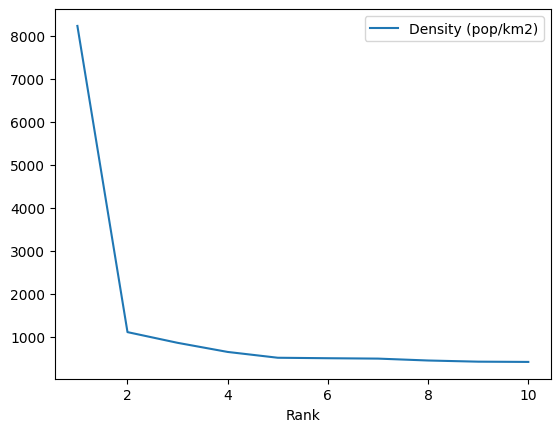

In [78]:
df_poblacion.plot(x = 'Rank', y = 'Density (pop/km2)')

<Axes: xlabel='population', ylabel='total_rooms'>

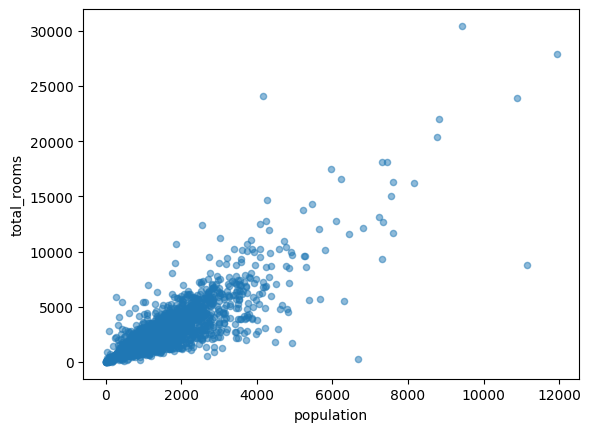

In [79]:
df_casas.plot.scatter(x = 'population', y = 'total_rooms', alpha = 0.5)

 ## Para Entregar:

## Ejercicio:
- Crea un DataFrame con una matriz de ceros con dimensión (5, 4)
- Asigna números enteros pares como índice.
- Asigna letras como columnas.

In [80]:
df_ceros = pd.DataFrame(data= np.zeros((5, 4)),
                        columns = ['A', 'B', 'C','D'],
                        index= [0,2,4,6,8])
df_ceros

,A,B,C,D
0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0


### Ejercicio:
- Del DataFrame del Titanic, filtra y quédate solo con columnas y filas pares.

In [81]:
df_titanic.iloc[1::2,1::2]

,Pclass,Sex,SibSp,Ticket,Cabin
PassengerId,,,,,
2,1,female,1,PC 17599,C85
4,1,female,1,113803,C123
6,3,male,0,330877,NaN
8,3,male,3,349909,NaN
10,2,female,1,237736,NaN
...,...,...,...,...,...
882,3,male,0,349257,NaN
884,2,male,0,C.A./SOTON 34068,NaN
886,3,female,0,382652,NaN


### Ejercicio:
-- En el DataFrame del Titanic, obtener los valores NULOS(NaN) de todas las columnas.    
-- Sólo de la columna "Cabin".

In [82]:
nulls = df_titanic.loc[:,['Cabin']]
cabin_nulls = nulls[nulls['Cabin'].isnull()]
cabin_nulls.head(15)

,Cabin
PassengerId,
1,NaN
3,NaN
5,NaN
6,NaN
8,NaN
9,NaN
10,NaN
13,NaN
14,NaN


### Ejercicio:  
Mostrar los datos del pasajero con ID 148

In [83]:
id = df_titanic.loc[148,:]
id

,148
Survived,0
Pclass,3
Name,"Ford, Miss. Robina Maggie ""Ruby"""
Sex,female
Age,9.0
SibSp,2
Parch,2
Ticket,W./C. 6608
Fare,34.375
Cabin,NaN


### Ejercicio
Mostrar  los nombres de los pasajeros que iban en primera clase ordenadas alfabéticamente.

In [84]:
primera = df_titanic[df_titanic['Pclass'] == 1]
primera = primera.sort_values('Name')
primera.loc[:,['Name']]



,Name
PassengerId,
731,"Allen, Miss. Elisabeth Walton"
306,"Allison, Master. Hudson Trevor"
298,"Allison, Miss. Helen Loraine"
499,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
461,"Anderson, Mr. Harry"
...,...
156,"Williams, Mr. Charles Duane"
352,"Williams-Lambert, Mr. Fletcher Fellows"
56,"Woolner, Mr. Hugh"



## Ejercicio

 Utilizando el dataset del Titanic, Mostrar por pantalla el porcentaje de personas que sobrevivieron en cada clase.

In [85]:
clases = df_titanic.groupby('Pclass')
porcentajes = clases['Survived'].mean()
porcentajes

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Ejercicio  
Eliminar del DataFrame el Titanic los pasajeros con edad desconocida.


In [86]:
df_titanic = df_titanic.dropna(subset = ['Age'])
df_titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## Ejercicio:

Del DataFrame de densidad poblacional, filtra las columnas de población y área, y las filas de Singapore, Bangladesh y Lebanon.

In [87]:
paises_seleccionados = df_poblacion.loc[['India', 'Singapore', 'Lebanon'],['Population','Area (km2)']]
paises_seleccionados

,Population,Area (km2)
Country,,
India,1389637446,3287263
Singapore,5921231,719
Lebanon,5296814,10400




## Ejercicio

 Queremos conocer la densidad de los países el siguiente año. Si suponemos que la población de todos crecerá un $5\%$, entonces, utilizando el dataframe de población:
- Calcula la nueva población y actualiza esta columna.

In [88]:
df_poblacion['Population'] = df_poblacion['Population'].apply(lambda x: x * 1.05)
df_poblacion

,Rank,Population,Area (km2),Density (pop/km2)
Country,,,,
Singapore,1,6.217293e+06,719,8235
Bangladesh,2,1.739330e+08,148460,1116
Palestine[note 3][101],3,5.484150e+06,6025,867
Taiwan[note 4],4,2.475975e+07,35980,655
South Korea,5,5.443708e+07,99720,520
Lebanon,6,5.561655e+06,10400,509
Rwanda,7,1.383242e+07,26338,500
Burundi,8,1.333130e+07,27830,456
Israel,9,9.872748e+06,21937,429


## Ejercicio:
- A partir del dataframe que creaste con la nueva población, crea uno nuevo pero con la densidad poblacional correcta.

In [89]:
df_nuevaPoblacion = df_poblacion.copy()
df_nuevaPoblacion['Population'] = df_nuevaPoblacion['Population'].apply(lambda x: x * 1.05)
df_nuevaPoblacion['Density (pop/km2)'] = df_nuevaPoblacion['Population'] / df_nuevaPoblacion['Area (km2)']
df_nuevaPoblacion

,Rank,Population,Area (km2),Density (pop/km2)
Country,,,,
Singapore,1,6.528157e+06,719,9079.495379
Bangladesh,2,1.826296e+08,148460,1230.160640
Palestine[note 3][101],3,5.758358e+06,6025,955.743983
Taiwan[note 4],4,2.599773e+07,35980,722.560728
South Korea,5,5.715893e+07,99720,573.194239
Lebanon,6,5.839737e+06,10400,561.513215
Rwanda,7,1.452404e+07,26338,551.447996
Burundi,8,1.399787e+07,27830,502.977614
Israel,9,1.036639e+07,21937,472.552548
